# Notebook to create theory content of HDBSCAN algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()


/Users/emilneby/miniforge3/envs/master/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [80]:
moons, _ = data.make_moons(n_samples=40, noise=0.05)
blobs, _ = data.make_blobs(n_samples=40, centers=[(2.5,-1), (-1, -1.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])


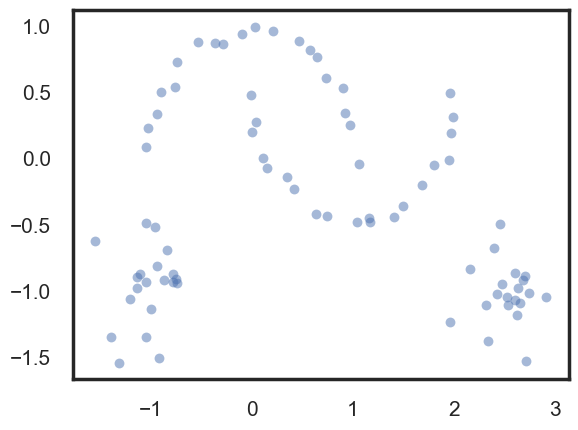

In [81]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plot_kwds = {'alpha' : 0.5, 's' : 50, 'linewidths':0}
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)
plt.savefig('figures/random_data.jpg', bbox_inches='tight')

In [82]:
import hdbscan

In [83]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

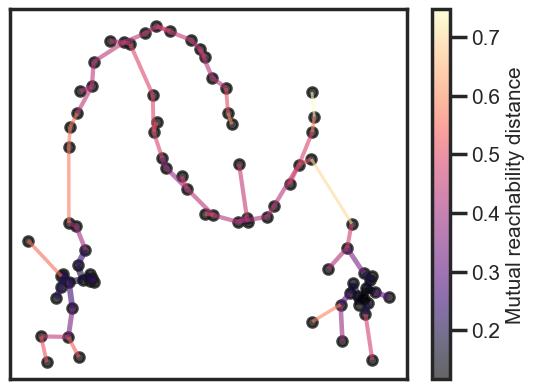

In [84]:
plt.rc('axes', labelsize=15)
#fig= plt.figure( dpi=200)
clusterer.minimum_spanning_tree_.plot(edge_cmap='magma',
                                      edge_alpha=0.6,
                                      node_size=50,
                                      edge_linewidth=2, )

plt.savefig('figures/mst.jpg', bbox_inches='tight', dpi=200)

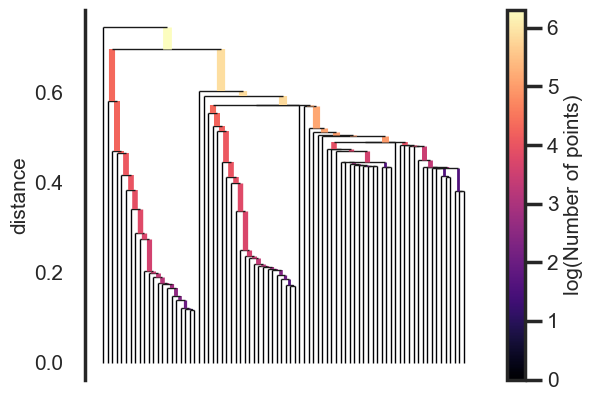

In [85]:
clusterer.single_linkage_tree_.plot(cmap='magma', colorbar=True)
plt.savefig('figures/dendogram.jpg', bbox_inches='tight', dpi=200)

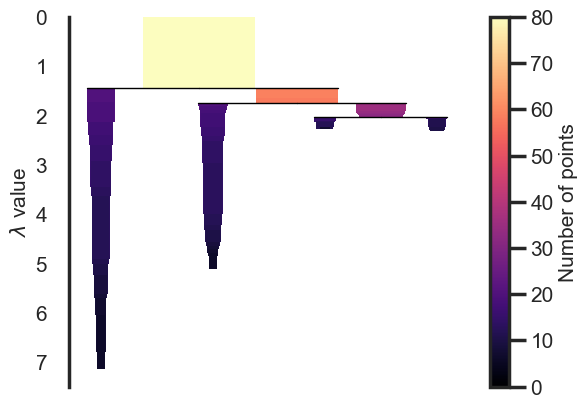

In [86]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
clusterer.condensed_tree_.plot(cmap='magma')
plt.savefig('figures/condensed_tree.jpg', bbox_inches='tight', dpi=200)

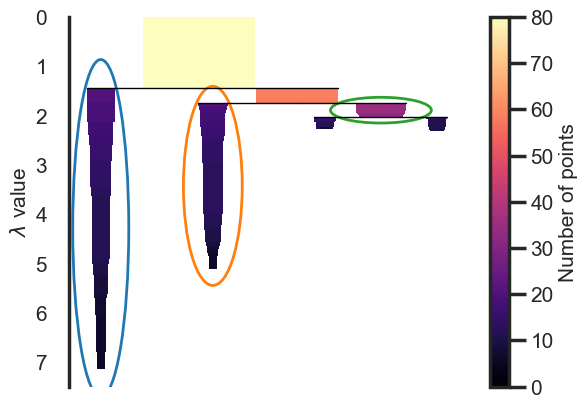

In [87]:
clusterer.condensed_tree_.plot(cmap='magma', select_clusters=True, selection_palette=sns.color_palette())
plt.savefig('figures/condensed_tree_selected.jpg', bbox_inches='tight', dpi=200)

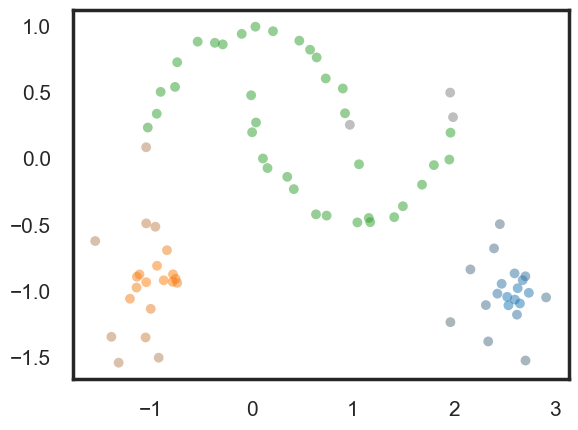

In [88]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.savefig('figures/scatter_labeled.jpg', bbox_inches='tight')